# Proyecto Ciencia de datos en Python

Elaborado por Jilmer Perén,
Guatemala abril 2020

### Importando librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

#metodos y funciones
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline

### Cargando datos con numpy

In [2]:
# Cargamos los datos con np
np_data = np.load("proyecto_training_data.npy")
print('Cantidad de Filas y columnas:', np_data.shape)

Cantidad de Filas y columnas: (1460, 6)


## Convirtiendo datos a dataframe de pandas

In [3]:
#convertimos a dataframe de pd
pd_data = pd.DataFrame(np_data)

print('Cantidad de Filas y columnas:', pd_data.shape)
#asignamos encabezados
pd_data.columns = ['salesPrice' , 'overallQual' , 'firstfloorSF' , 'roomsAbvGrd' , 'yearBuilt' , 'lotFrontage']

Cantidad de Filas y columnas: (1460, 6)


# Análisis exploratorio de datos

## Primer acercamiento a archivo

In [4]:
pd_data.head()

,salesPrice,overallQual,firstfloorSF,roomsAbvGrd,yearBuilt,lotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [5]:
# Convirtiendo precios
pd_data.salesPrice = pd_data.salesPrice/1000
pd_data.head()

,salesPrice,overallQual,firstfloorSF,roomsAbvGrd,yearBuilt,lotFrontage
0,208.5,7.0,856.0,8.0,2003.0,65.0
1,181.5,6.0,1262.0,6.0,1976.0,80.0
2,223.5,7.0,920.0,6.0,2001.0,68.0
3,140.0,7.0,961.0,7.0,1915.0,60.0
4,250.0,8.0,1145.0,9.0,2000.0,84.0


In [6]:
print('Información y Tipos de datos:')
pd_data.info()

Información y Tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   salesPrice    1460 non-null   float64
 1   overallQual   1460 non-null   float64
 2   firstfloorSF  1460 non-null   float64
 3   roomsAbvGrd   1460 non-null   float64
 4   yearBuilt     1460 non-null   float64
 5   lotFrontage   1201 non-null   float64
dtypes: float64(6)
memory usage: 68.6 KB


## Histogramas

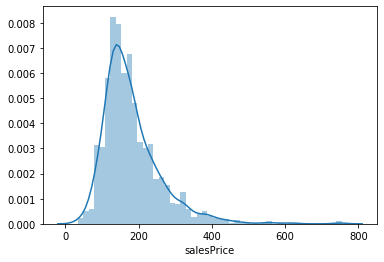

In [7]:
ax1 = sns.distplot(pd_data.salesPrice)

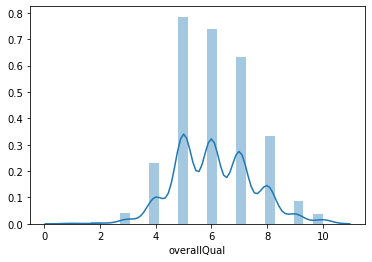

In [8]:
ax2 = sns.distplot(pd_data.overallQual)

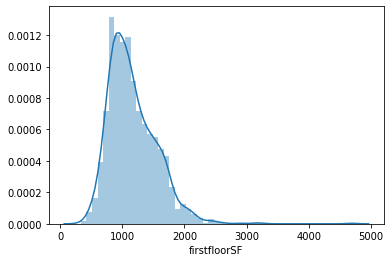

In [9]:
ax3 = sns.distplot(pd_data.firstfloorSF)

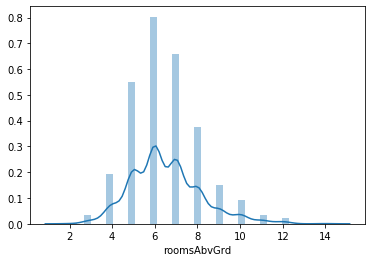

In [10]:
ax4 = sns.distplot(pd_data.roomsAbvGrd)

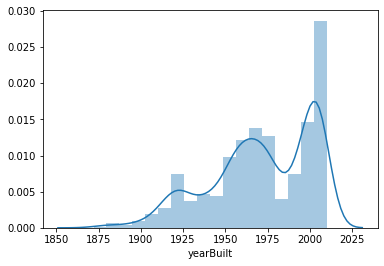

In [11]:
ax5 = sns.distplot(pd_data.yearBuilt)

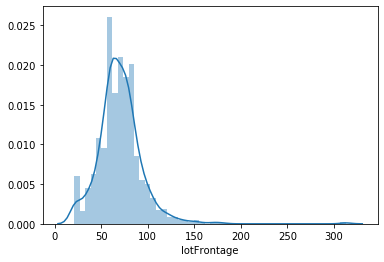

In [12]:
ax6 = sns.distplot(pd_data.lotFrontage)

## Análisis descriptivo

In [13]:
pd_data.describe()

,salesPrice,overallQual,firstfloorSF,roomsAbvGrd,yearBuilt,lotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180.921196,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79.442503,1.382997,386.587738,1.625393,30.202904,24.284752
min,34.900000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129.975000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


### Coeficiente de correlación de Pearson

In [14]:
cp1 = pd_data.corr(method="pearson")["salesPrice"]["overallQual"]
cp2 = pd_data.corr(method="pearson")["salesPrice"]["firstfloorSF"]
cp3 = pd_data.corr(method="pearson")["salesPrice"]["roomsAbvGrd"]
cp4 = pd_data.corr(method="pearson")["salesPrice"]["yearBuilt"]
cp5 = pd_data.corr(method="pearson")["salesPrice"]["lotFrontage"]

print(cp1, cp2, cp3, cp4, cp5)

0.7909816005838064 0.6058521846919153 0.5337231555820232 0.5228973328794962 0.3517990965706789


### Sales price  Overall Quality

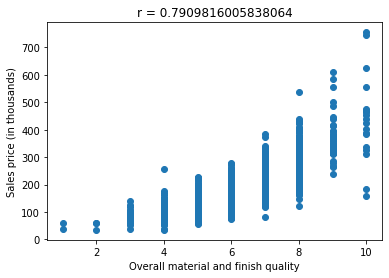

In [15]:
plt.scatter(pd_data.overallQual, pd_data.salesPrice)
plt.xlabel("Overall material and finish quality")
plt.ylabel("Sales price (in thousands)")
plt.title("r = " + str(cp1))
plt.show()

### Sales price & First Floor square feet

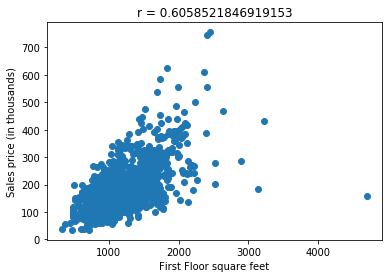

In [16]:
plt.scatter(pd_data.firstfloorSF, pd_data.salesPrice)
plt.xlabel("First Floor square feet")
plt.ylabel("Sales price (in thousands)")
plt.title("r = " + str(cp2))
plt.show()

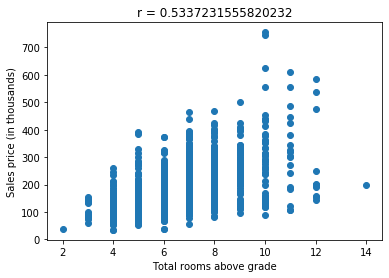

In [17]:
plt.scatter(pd_data.roomsAbvGrd, pd_data.salesPrice)
plt.xlabel("Total rooms above grade")
plt.ylabel("Sales price (in thousands)")
plt.title("r = " + str(cp3))
plt.show()

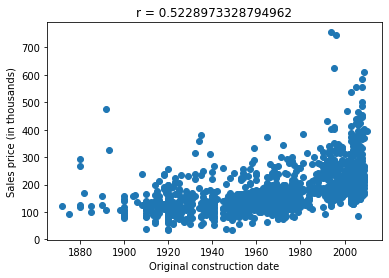

In [18]:
plt.scatter(pd_data.yearBuilt, pd_data.salesPrice)
plt.xlabel("Original construction date")
plt.ylabel("Sales price (in thousands)")
plt.title("r = " + str(cp4))
plt.show()

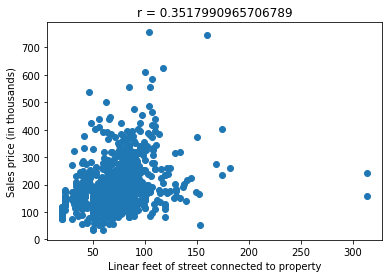

In [19]:
plt.scatter(pd_data.lotFrontage, pd_data.salesPrice)
plt.xlabel("Linear feet of street connected to property")
plt.ylabel("Sales price (in thousands)")
plt.title("r = " + str(cp5))
plt.show()

## Variables seleccionadas como predictoras

overallQual: Overall material and finish quality, rates the overall material and finish of the house

firstfloorSF: First Floor square feet

roomsAbvGrd: Total rooms above grade (does not include bathrooms)

NOTA: para los ejemplos se toman las variables overallQual y roomsAbvGrd, la variable firstfloorSF no tiene buenos resultados en el modelo manual

In [20]:
#dataframe para modelo
salesPrice = pd_data.iloc[:,0:1]
overallQual = pd_data.iloc[:,1:2]
firstfloorSF = pd_data.iloc[:,2:3]
roomsAbvGrd = pd_data.iloc[:,3:4]
print('Variable dependiente')
salesPrice.head()

Variable dependiente


,salesPrice
0,208.5
1,181.5
2,223.5
3,140.0
4,250.0


In [21]:
print('Variable independiente 1')
overallQual.head()

Variable independiente 1


,overallQual
0,7.0
1,6.0
2,7.0
3,7.0
4,8.0


In [22]:
print('Variable independiente 2')
firstfloorSF.head()

Variable independiente 2


,firstfloorSF
0,856.0
1,1262.0
2,920.0
3,961.0
4,1145.0


## Modelos de Regresión

### Funciones para graficar

In [23]:
#grafica puntos
def grafica_puntos (y, yest, pts_graf):
    eje_x = list(range(pts_graf))
    eje_y = y
    eje_y2 = yest
    
    fig, ax = plt.subplots()
    ax.plot(eje_x, eje_y, '-', eje_x, eje_y2, 'o')
    fig.set_size_inches(15,8)
    plt.show()

In [24]:
#grafica cambio error
def cambio_error (vals, freq_pts_graf):
    puntos_graficar = vals[vals.index % freq_pts_graf == 0]
    print(puntos_graficar.head())
    plt.plot(puntos_graficar, '-b', label = 'Loss')
    plt.show()

     salesPrice
0         208.5
100       205.0
200       140.0
300       157.0
400       245.5


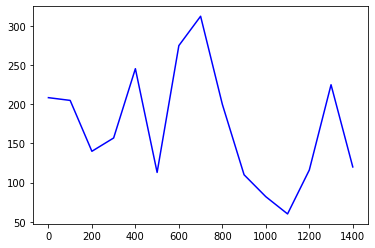

In [25]:
#probando grafica cambio_error
cambio_error(salesPrice, 100)

In [131]:
def graph_reg (var_x, var_y, var_yest) :
    plt.scatter(var_x, var_y,color='b')
    plt.plot(var_x, var_yest,color='r')
    
    plt.show()

## Modelo 1: regresión manual

### Función de estimación

$$
y = mx + b
$$

In [103]:
#parametros:
#var_x: variable independiente
#var_y: variable dependiente
#epochs: iteraciones
#imprimir_error_cada: imprimir error a cada n iteracion
#lr: learning rate
#pts_graf: puntos a graficar
def modelo1 (var_x, var_y, epochs, imprimir_error_cada, lr, freq_pts_graf, pts_graf):
    m = 0
    b = 0
    imprimir_error = 0
    mce1_train = list()
    mce1_test = list()
    m1_m = list()
    m1_b = list()
    imprimir_error += imprimir_error_cada
    
    #convirtiendo tipo
    var_x = var_x.values
    var_y = var_y.values

    #Train and test split
    ochenta_por = int(len(pd_data) * 0.8)
    X_train = var_x[0:ochenta_por]
    #X_train = var_x[0:3]
    X_test = var_x[ochenta_por:]
    y_train = var_y[0:ochenta_por]
    #y_train = var_y[0:3]
    y_test = var_y[ochenta_por:]

    #print(X_train, y_train)

    #training
    for i in range(1,epochs+1):
        #estimacion
        m1_yesttrain = m*X_train + b
        #print(m1_yesttrain)
        
        #calculando error
        error = np.mean(np.power(np.subtract(y_train, m1_yesttrain), 2)/2)
        if i == imprimir_error :
            print('Error iteración {}: {}'.format(i, error))
            imprimir_error += imprimir_error_cada
        
        #guardando parametros
        mce1_train.append(error)    
        m1_b.append(b)
        m1_m.append(m)
        #print('Parametros m y b: {} {}'.format(m, b))
        
        #calculando gradientes
        g_b = np.mean(np.subtract(m1_yesttrain, y_train))
        g_m = np.mean(np.multiply(np.subtract(m1_yesttrain, y_train), X_train))
        #print('gradientes m y b: {} {}'.format(g_m, g_b))
        
        #nuevos parametros
        b -= (lr * g_b)
        m -= (lr * g_m)
        #print('NUEVOS Parametros *** m y b: {} {}'.format(m, b))

    #buscando el mejor modelo, error más pequeño
    df1_error = pd.DataFrame({'m' : m1_m, 'b' : m1_b, 'mce': mce1_train})
    df1_error = df1_error[df1_error['mce']  != 0]
    min_error = df1_error[df1_error['mce'] == df1_error['mce'].min()]
    min_error.head()

    m2 = min_error.iloc[0,0]
    b2 = min_error.iloc[0,1]

    print('Parametros optimos m y b: {} {}'.format(m2, b2))

    #aplicando parametros de entrenamiento al modelo
    m1_yest = m2*X_test + b2
    mce1_test = np.mean(np.power(np.subtract(m1_yest, y_test), 2)/2)
    
    #salidas
    print('Modelo 1, MCE:' + str(min_error.iloc[0,2]))
    print('Ecuación de regresión: Y = {}x + ({})'.format(m2,b2))

    #graficas
    #puntos
    #print('Datos entrenamiento')
    grafica_puntos(y_test[:pts_graf], m1_yest[:pts_graf], pts_graf)
    
    #error
    #sdf = DataFrame (your_list,columns=['Column_Name'])
    print('Cambio de error en el tiempo')
    cambio_error(pd.DataFrame(mce1_train), freq_pts_graf)
    
    #puntos
    graph_reg(X_test, y_test, m1_yest)
    
    return {'m1_Xtest': X_test, 'm1_ytest': y_test, 'm1_yest': m1_yest, 'm1_mce': min_error.iloc[0,2]}

## Modelo 2: utilizando herramienta scikit-learn

In [66]:
#Parámetros:
#var_X: variable independiente
#var_y: variable dependiente
#pts_graf puntos a graficar
def modelo2 (var_X, var_y, freq_pts_graf, pts_graf):
    #var_X = data_x.iloc[:,1:2]
    #var_y = data_y.iloc[:,0:1]
    #print(var_X.head, var_y.head)
    mce1_test = list()
    
    #definiendo datos de entrenamiento y pruebas
    X_train, X_test, y_train, y_test = train_test_split(var_X, var_y, test_size = 0.2, random_state = 1)

    modelo = LinearRegression()
    #entrenamiento del modelo
    modelo.fit(X_train, y_train)
    #estimaciones
    m2_yest = modelo.predict(X_test)
    m2_mce = mean_squared_error(y_test, m2_yest)
    
    #calculando errores
    #NOTA: FALTA AFINAR
    print('Cambio de error en el tiempo')
    #mce2_train = mean_squared_log_error(y_train, modelo.predict(X_train), multioutput='raw_values')
    
    #salidas
    print('Datos entrenamiento')
    #puntos
    grafica_puntos(y_test[:pts_graf], m2_yest[:pts_graf], pts_graf)
    
    #error
    print('Modelo 2, MCE:' + str( m2_mce))
    print('Ecuación de regresión: Y = {}x + {}'.format(modelo.coef_, modelo.intercept_))
    
    #puntos
    graph_reg(X_test, y_test, m2_yest)
    
    return {'m2_yest': m2_yest, 'm2_mce': m2_mce}

### Función principal para llamar a las funciones de regresión

In [195]:
def funcion_principal(f_modelo1, f_modelo2, var_X, var_y, epochs, freq_imprimir_error, lr, freq_pts_graf, pts_graf):
    print('Modelo scikit-learn')
    mod2 = f_modelo2(var_X, var_y, freq_pts_graf, pts_graf)
    #print(type(m2_yest), type(mce2_train))
    
    print('')
    print('')
    print('Modelo manual')
    mod1 = f_modelo1(var_X, var_y, epochs, freq_imprimir_error, lr, freq_pts_graf, pts_graf)
    
    print('')
    print('')
    print('Promediando')
    df_m1 = pd.DataFrame(mod1['m1_yest'], columns=['m1'])
    df_m2 = pd.DataFrame(mod2['m2_yest'], columns=['m2'])
    df_m1.reset_index(drop=True, inplace=True)
    df_m2.reset_index(drop=True, inplace=True)
    df_promedio = pd.concat([df_m1, df_m2], axis=1)
    df_promedio['mean'] = df_promedio.mean(axis=1)
    plt.title("Matplotlib promedio") 
    plt.scatter(mod1['m1_Xtest'], mod1['m1_ytest'],color='b')
    plt.plot(mod1['m1_Xtest'], mod1['m1_yest'],color='r')
    plt.show() 
    
    
    print('')
    print('')
    print('Error')
    fig, ax = plt.subplots()
    index = np.arange(1)
    bar_width = 0.35
    opacity = 0.8

    rects1 = plt.bar(index, (mod1['m1_mce']), bar_width,
    alpha=opacity,
    color='b',
    label='Error M1')

    rects2 = plt.bar(index + bar_width, (mod2['m2_mce']), bar_width,
    alpha=opacity,
    color='g',
    label='Error M2')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Error modelos')
    #plt.xticks(index + bar_width, ('EM1', 'EM2'))
    plt.legend()

    plt.tight_layout()
    plt.show()
    return df_promedio

Modelo scikit-learn
Cambio de error en el tiempo
Datos entrenamiento


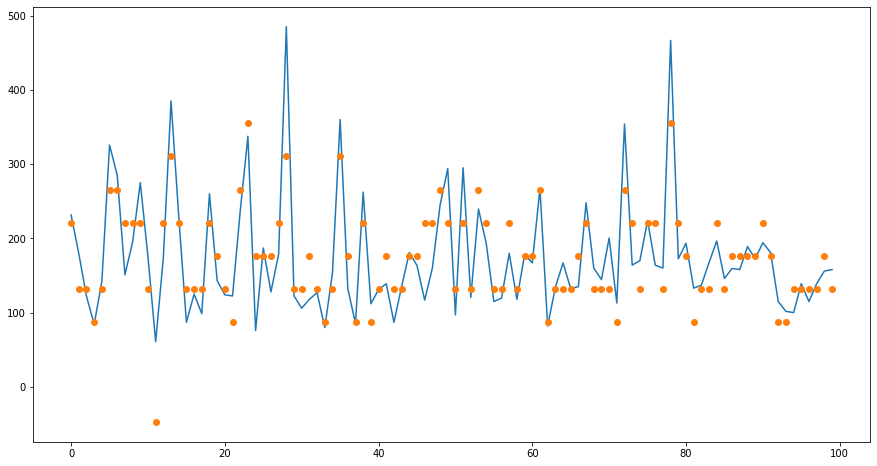

Modelo 2, MCE:2420.651458810333
Ecuación de regresión: Y = [[44.69132566]]x + [-91.94692242]


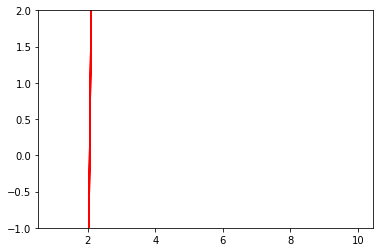



Modelo manual
Error iteración 2: 7864.2499144977655
Error iteración 4: 2228.493860927385
Error iteración 6: 1501.2171803691494
Error iteración 8: 1407.0104326858761
Error iteración 10: 1394.454395523841
Parametros optimos m y b: 29.398104179905896 4.149940649695312
Modelo 1, MCE:1394.454395523841
Ecuación de regresión: Y = 29.398104179905896x + (4.149940649695312)


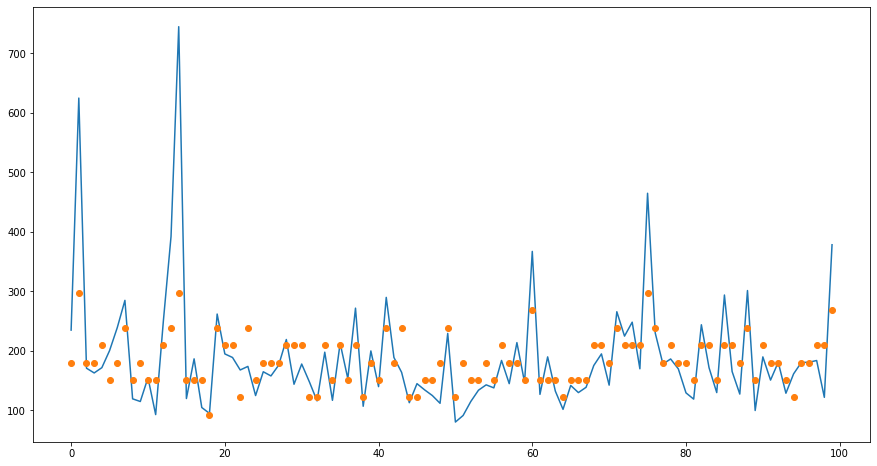

Cambio de error en el tiempo
              0
0  19409.722053
1   7864.249914
2   3717.770447
3   2228.493861
4   1693.499585


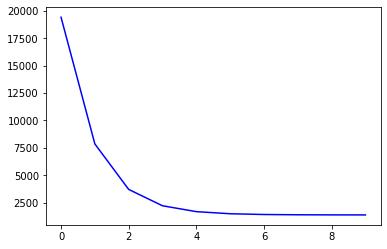

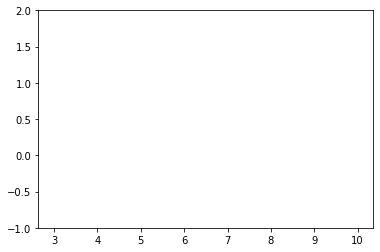



Promediando


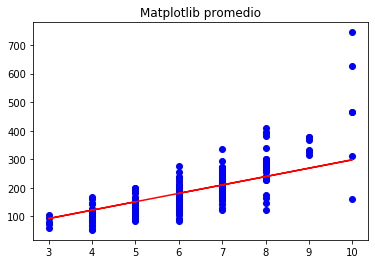



Error


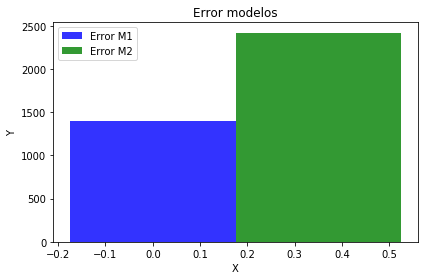

             m1          m2        mean
0    180.538566  220.892357  200.715461
1    298.130982  131.509706  214.820344
2    180.538566  131.509706  156.024136
3    180.538566   86.818380  133.678473
4    209.936670  131.509706  170.723188
5    151.140462  265.583683  208.362072
6    180.538566  265.583683  223.061124
7    239.334774  220.892357  230.113566
8    151.140462  220.892357  186.016409
9    180.538566  220.892357  200.715461
10   151.140462  131.509706  141.325084
11   151.140462  -47.255597   51.942432
12   209.936670  220.892357  215.414514
13   239.334774  310.275009  274.804891
14   298.130982  220.892357  259.511670
15   151.140462  131.509706  141.325084
16   151.140462  131.509706  141.325084
17   151.140462  131.509706  141.325084
18    92.344253  220.892357  156.618305
19   239.334774  176.201032  207.767903
20   209.936670  131.509706  170.723188
21   209.936670   86.818380  148.377525
22   121.742357  265.583683  193.663020
23   239.334774  354.966334  297.150554


In [196]:
#variable predictora 1:

#parametros:
#f_modelo1: modelo manual
#f_modelo2: modelo scikit-learn
#var_x: variable independiente
#var_y: variable dependiente
#epochs: iteraciones
#imprimir_error_cada: imprimir error a cada n iteracion
#lr: learning rate
#pts_graf: puntos a graficar

retorno = funcion_principal(f_modelo1 = modelo1, f_modelo2 = modelo2, var_X = overallQual, var_y = salesPrice, epochs = 10, freq_imprimir_error = 2, lr = 0.01, freq_pts_graf = 1, pts_graf = 100)
pd.set_option('display.max_rows', retorno.shape[0]+1)
print(retorno)

Modelo scikit-learn
Cambio de error en el tiempo
Datos entrenamiento


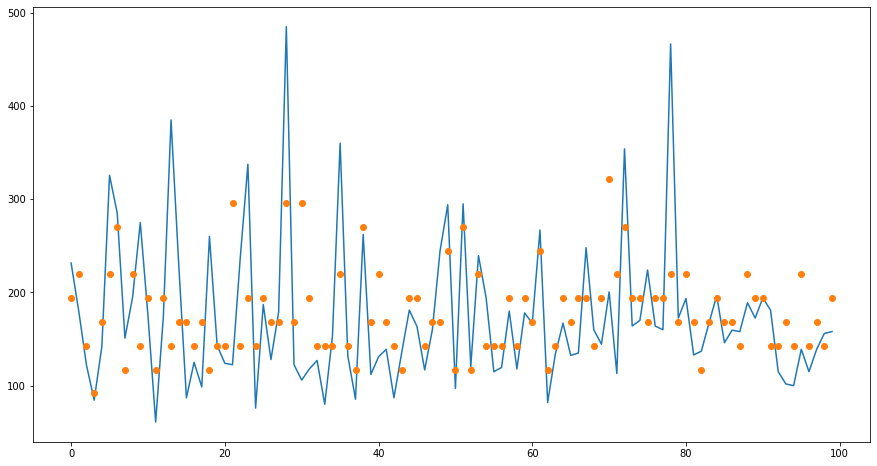

Modelo 2, MCE:5074.808590017607
Ecuación de regresión: Y = [[25.52262192]]x + [15.06576019]


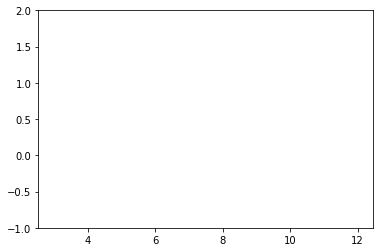



Modelo manual
Error iteración 2: 7233.9768401667925
Error iteración 4: 2562.5862828164463
Error iteración 6: 2153.2145974080377
Error iteración 8: 2117.3393894710125
Error iteración 10: 2114.195060225537
Parametros optimos m y b: 27.14645354394017 3.933879186416658
Modelo 1, MCE:2114.195060225537
Ecuación de regresión: Y = 27.14645354394017x + (3.933879186416658)


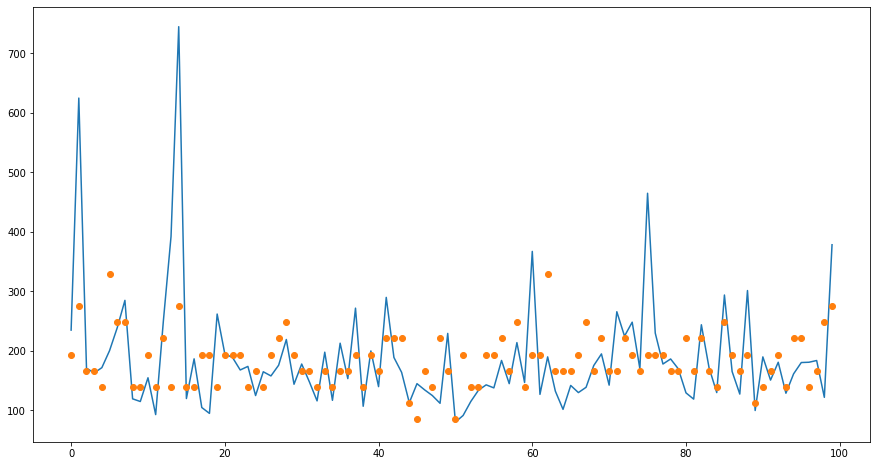

Cambio de error en el tiempo
              0
0  19409.722053
1   7233.976840
2   3629.592094
3   2562.586283
4   2246.720490


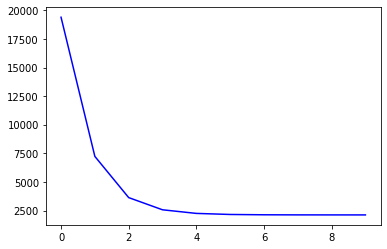

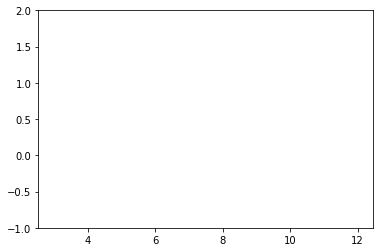



Promediando


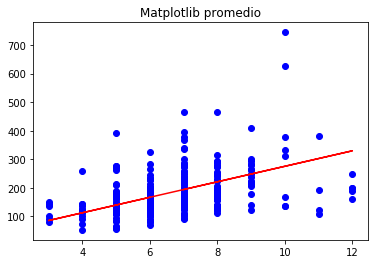



Error


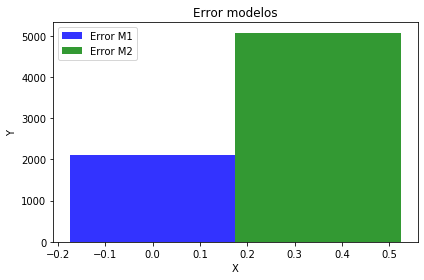

             m1          m2        mean
0    193.959054  193.724114  193.841584
1    275.398415  219.246736  247.322575
2    166.812600  142.678870  154.745735
3    166.812600   91.633626  129.223113
4    139.666147  168.201492  153.933819
5    329.691322  219.246736  274.469029
6    248.251961  270.291979  259.271970
7    248.251961  117.156248  182.704104
8    139.666147  219.246736  179.456441
9    139.666147  142.678870  141.172508
10   193.959054  193.724114  193.841584
11   139.666147  117.156248  128.411197
12   221.105508  193.724114  207.414811
13   139.666147  142.678870  141.172508
14   275.398415  168.201492  221.799953
15   139.666147  168.201492  153.933819
16   139.666147  142.678870  141.172508
17   193.959054  168.201492  181.080273
18   193.959054  117.156248  155.557651
19   139.666147  142.678870  141.172508
20   193.959054  142.678870  168.318962
21   193.959054  295.814601  244.886828
22   193.959054  142.678870  168.318962
23   139.666147  193.724114  166.695130


In [197]:
#variable predictora 1:

#parametros:
#f_modelo1: modelo manual
#f_modelo2: modelo scikit-learn
#var_x: variable independiente
#var_y: variable dependiente
#epochs: iteraciones
#imprimir_error_cada: imprimir error a cada n iteracion
#lr: learning rate
#pts_graf: puntos a graficar
retorno = funcion_principal(f_modelo1 = modelo1, f_modelo2 = modelo2, var_X = roomsAbvGrd, var_y = salesPrice, epochs = 10, freq_imprimir_error = 2, lr = 0.01, freq_pts_graf = 1, pts_graf = 100)
pd.set_option('display.max_rows', retorno.shape[0]+1)
print(retorno)